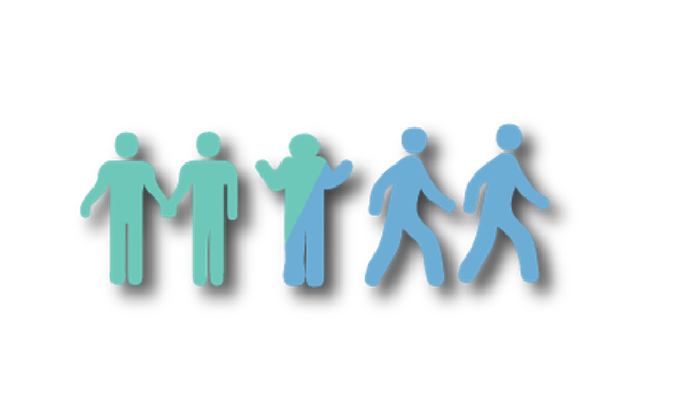

<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Introduction</span>
<a id = "introduction" ></a>

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.</span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself. 
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

___

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading libraries and data</span>
<a id="loading"></a>

In [2]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.0.0-py3-none-win_amd64.whl (99.7 MB)


In [7]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [10]:
#loading data
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [11]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,99996.0,Customer_99996,33.0,Male,Houston,23.0,55.13,226.0,1.0
99996,99997.0,Customer_99997,62.0,Female,New York,19.0,61.65,351.0,0.0
99997,99998.0,Customer_99998,64.0,Male,Chicago,17.0,96.11,251.0,1.0
99998,99999.0,Customer_99999,51.0,Female,New York,20.0,49.25,434.0,1.0


___

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Undertanding the data</span>
<a id = "Undertanding the data" ></a>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [12]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [20]:
df["Gender"].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [21]:
df["Churn"].value_counts()

0.0    50221
1.0    49779
Name: Churn, dtype: int64

The proportion of churn and not churn is almost same

In [13]:
df.shape

(100000, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [15]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [16]:
df.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object


* The target the we will use to guide the exploration is **Churn**

***

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

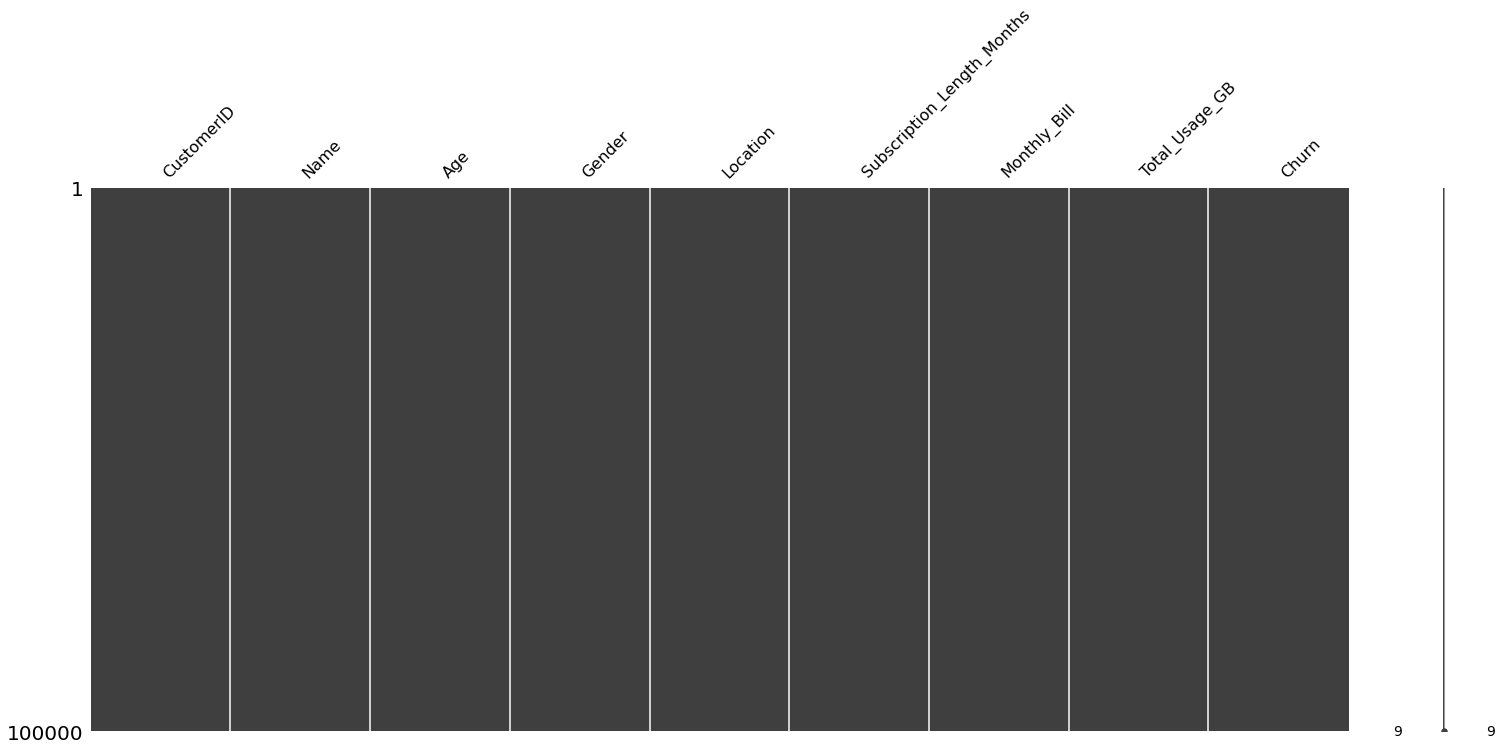

In [17]:
# Visualize missing values as a matrix
msno.matrix(df);

> Using this matrix we can very quickly find the pattern of missingness in the dataset. 
* From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

***

___

<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Visualization </span>
<a id = "datavisualization" ></a>

In [24]:
g_labels = ['Male', 'Female']
values_churn=df['Churn'].value_counts()
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=values_churn.index, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* from the above fig we can see the disribution of churn and gender is same.

In [26]:
df["Churn"][df["Churn"]==0.0].groupby(by=df["Gender"]).count()

Gender
Female    25272
Male      24949
Name: Churn, dtype: int64

In [27]:
df["Churn"][df["Churn"]==1.0].groupby(by=df["Gender"]).count()

Gender
Female    24944
Male      24835
Name: Churn, dtype: int64

In [31]:
fig = px.histogram(df, x="Churn", color="Location", barmode="group", title="<b>Customer Location distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [41]:
(df["Churn"]==1.0).value_counts()

False    50221
True     49779
Name: Churn, dtype: int64

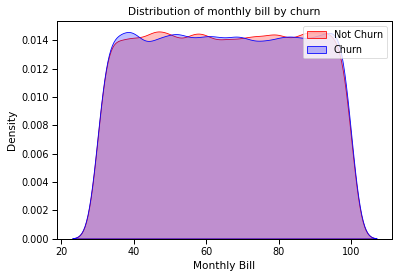

In [42]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 0.0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 1.0) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Bill');
ax.set_title('Distribution of monthly bill by churn');


* Customers with higher Monthly Charges are also more likely to churn

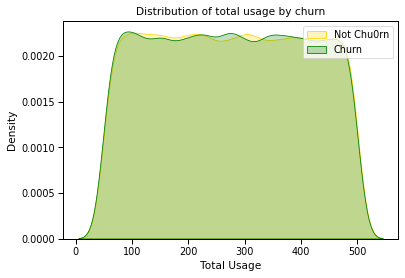

In [43]:
ax = sns.kdeplot(df.Total_Usage_GB[(df["Churn"] == 0.0) ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.Total_Usage_GB[(df["Churn"] == 1.0) ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Usage');
ax.set_title('Distribution of total usage by churn');

___

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Preprocessing</span>
<a id = "datapreprocessing" ></a>

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [44]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [45]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,0,63.0,1,2,17.0,73.36,236.0,0.0
1,2.0,11112,62.0,0,4,1.0,48.76,172.0,0.0
2,3.0,22223,24.0,0,2,5.0,85.47,460.0,0.0
3,4.0,33334,36.0,0,3,3.0,97.94,297.0,1.0
4,5.0,44445,46.0,0,3,19.0,58.14,266.0,0.0


In [46]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn                         1.000000
Location                      0.006405
Subscription_Length_Months    0.002328
Gender                        0.002121
Age                           0.001559
Monthly_Bill                 -0.000211
Name                         -0.001418
Total_Usage_GB               -0.002842
CustomerID                   -0.004586
Name: Churn, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [54]:
X = df.drop(columns = ['Name','Churn'])
y = df['Churn'].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [56]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

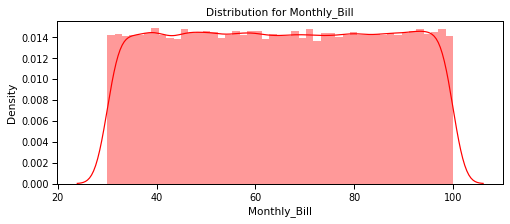

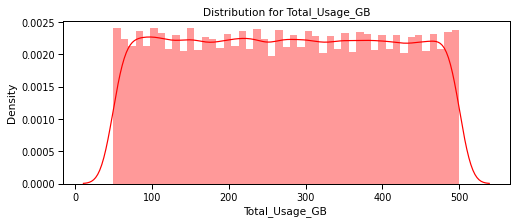

In [57]:
num_cols = ['Monthly_Bill', 'Total_Usage_GB']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

In [58]:
numerical_cols = ['Monthly_Bill', 'Total_Usage_GB']
df[numerical_cols].describe()

,Monthly_Bill,Total_Usage_GB
count,100000.000000,100000.000000
mean,65.053197,274.393650
std,20.230696,130.463063
min,30.000000,50.000000
25%,47.540000,161.000000
50%,65.010000,274.000000
75%,82.640000,387.000000
max,100.000000,500.000000


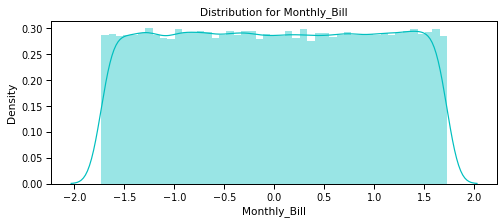

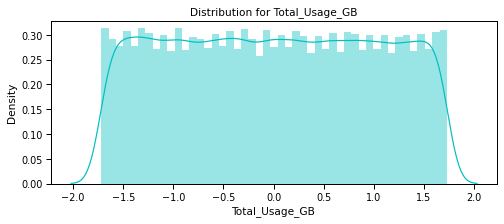

In [59]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [60]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

<a id = "101" ></a>
#### <b> KNN</b>
<a id = "knn" ></a>

In [61]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.4992666666666667


In [62]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     15066
         1.0       0.50      0.50      0.50     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

In [ ]:
print(classification_report(y_test, predict_y))

<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [64]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.4982666666666667


In [65]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.50      0.67      0.57     15066
         1.0       0.49      0.33      0.39     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.48     30000
weighted avg       0.50      0.50      0.48     30000



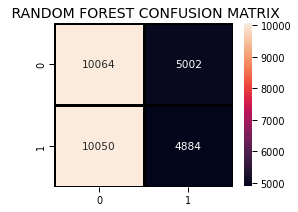

In [66]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

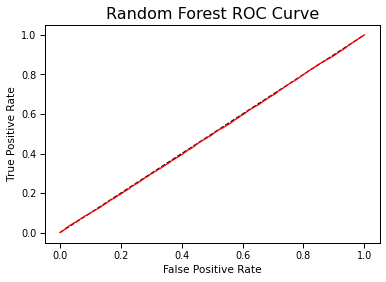

In [67]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [68]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.5022


In [69]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     15066
         1.0       0.00      0.00      0.00     14934

    accuracy                           0.50     30000
   macro avg       0.25      0.50      0.33     30000
weighted avg       0.25      0.50      0.34     30000



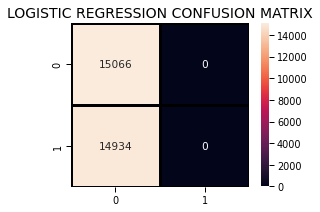

In [70]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

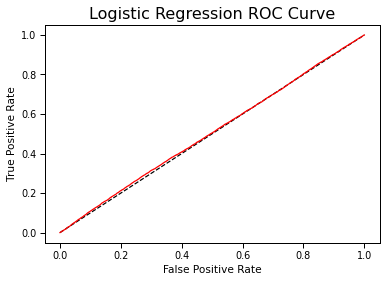

In [71]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [72]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.5031666666666667


Decision tree gives very low score.

In [73]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51     15066
         1.0       0.50      0.50      0.50     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



<a id = "106" ></a>
#### **AdaBoost Classifier**
<a id = "ada" ></a>

In [74]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.4991

In [75]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

         0.0       0.50      0.54      0.52     15066
         1.0       0.50      0.46      0.48     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



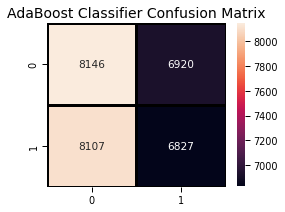

In [76]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

<a id = "107" ></a>
#### **Gradient Boosting Classifier**
<a id = "gb" ></a>

In [77]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.49616666666666664


In [78]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.57      0.53     15066
         1.0       0.49      0.42      0.45     14934

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



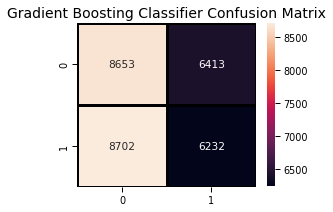

In [79]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn. 